<a href="https://colab.research.google.com/github/SilvioCesarTeixeira/PJI4/blob/master/MLP_PJI4_UBS_VilaEde_QA_SRGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar Bibliotecas

In [197]:
#!pip install openpyxl
!pip install pyexcel
!pip install sweetviz
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar pacotes

In [198]:
import pandas as pd
import numpy as np
#from google.colab import files
import io
import openpyxl
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor

import torch
import torch.nn as nn
import torch.nn.functional as F

Código para upload de arquivo instalado no computador

In [ ]:
#uploaded = files.upload()

Referenciar base de dados existente na rede

In [252]:
url_SG = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/SRAG_SubP_SP.xlsx'
url_QA = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/Santana_SP_AQI.xlsx'

Criar Dataframes

In [253]:
df1 = pd.read_excel(url_QA, engine='openpyxl')
df2 = pd.read_excel(url_SG, engine='openpyxl')
df2

,COVID19 S�ndrome Respirat�ria Aguda Grave (SRAG),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,N� de Casos por Ano M�s Dia Notifica��o e Subp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Per�odo:2020-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ano M�s Dia Notifica��o,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
3,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
4,02/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,16/03/2023,-,-,1,-,-,-,-,-,-,...,-,-,-,1,-,-,-,-,-,2
1164,Total,7630,11025,16107,14646,7806,10027,3824,5003,9601,...,9117,8919,6802,13368,8270,10806,7011,8556,130,301198
1165,Fonte: SIVEP GRIPE/DVE/COVISA/SMS-SP. Data de ...,sujeitos a altera��o.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166,Nota:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Definir a linha zero do dataframe 1 como título das colunas

In [254]:
df1
df1.columns = df1.iloc[0]
df1 = df1.reindex(df1.index.drop(0))
df1

,date,pm25,pm10,o3,no2,so2,co
1,2023/3/8,35,,24,,,
2,2023/3/9,47,,2,,,
3,2023/3/10,50,,18,,,
4,2023/3/11,52,,23,,,
5,2023/3/12,37,,14,,,
...,...,...,...,...,...,...,...
3267,2014/11/24,,,24,,,
3268,2014/11/25,,,28,,,
3269,2014/1/1,,,22,,,
3270,2019/2/10,,,,9,,


In [255]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 1 to 3271
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3271 non-null   object
 1    pm25   3271 non-null   object
 2    pm10   3271 non-null   object
 3    o3     3271 non-null   object
 4    no2    3271 non-null   object
 5    so2    3271 non-null   object
 6    co     3271 non-null   object
dtypes: object(7)
memory usage: 179.0+ KB


In [256]:
df1.describe()

,date,pm25,pm10,o3,no2,so2,co
count,3271,3271,3271,3271,3271,3271,3271
unique,3271,113,75,89,39,6,13
top,2023/3/8,,,28,,,
freq,1,1342,2011,104,2814,3088,3148


Definindo a primeira coluna como data com padrão Português do Brasil

In [257]:
df_QA = df1
df_QA['Data'] = pd.to_datetime(df1['date'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
col_Data_Brasil = df_QA.iloc[:, -1]
df_QA = df_QA.iloc[:, 1:-1]
df_QA.insert(loc=0, column='Data', value=col_Data_Brasil)
df_QA

,Data,pm25,pm10,o3,no2,so2,co
1,08/03/2023,35,,24,,,
2,09/03/2023,47,,2,,,
3,10/03/2023,50,,18,,,
4,11/03/2023,52,,23,,,
5,12/03/2023,37,,14,,,
...,...,...,...,...,...,...,...
3267,24/11/2014,,,24,,,
3268,25/11/2014,,,28,,,
3269,01/01/2014,,,22,,,
3270,10/02/2019,,,,9,,


Remover linhas desnecessárias e renomear coluna do dataframe 2

In [258]:
df_SRAG = df2
df_SRAG.columns = df_SRAG.iloc[2]
linhas_remover = list(range(0,3)) + list(range(1164,1168))
df_SRAG = df_SRAG.reindex(df_SRAG.index.drop(linhas_remover))
df_SRAG = df_SRAG.rename(columns={'Ano M�s Dia Notifica��o': 'Data'})
df_SRAG

2,Data,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
3,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
4,02/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,4
5,03/01/2020,-,-,2,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,3
6,05/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
7,06/01/2020,-,1,1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,12/03/2023,-,-,3,-,-,1,-,1,-,...,-,1,-,2,1,1,1,3,-,21
1160,13/03/2023,2,1,8,3,2,-,-,-,7,...,2,1,2,6,2,10,-,2,-,94
1161,14/03/2023,1,5,13,2,-,3,-,2,1,...,-,-,2,6,5,8,2,1,-,91
1162,15/03/2023,5,7,1,1,1,1,-,-,3,...,2,1,3,1,2,2,1,4,-,82


In [259]:
df_SRAG.describe()

2,Data,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
count,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,...,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161
unique,1161,37,41,56,58,36,43,22,25,42,...,45,42,36,54,41,41,33,43,6,541
top,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
freq,1,171,112,69,121,166,135,330,280,134,...,148,174,189,83,169,115,175,124,1065,11


Juntar os dois dataframes, mas mantendo apenas as datas que coincidem

In [309]:
df_SRAG = df_SRAG.loc[:, ['Data', 'VILA MARIA/VILA GUILHERME']]
df_base = pd.merge(df_QA, df_SRAG, how='inner', on='Data')

Definir uma data de corte

In [310]:
data_limite = '01/01/2020'
#df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')
df_base = df_base.loc[df_base['Data'] > data_limite]

Analisar o conteúdo e os tipos de dados do dataframe base

In [311]:
df_base.describe()

,Data,pm25,pm10,o3,no2,so2,co,VILA MARIA/VILA GUILHERME
count,1126,1126,1126,1126,1126,1126,1126,1126
unique,1126,109,1,72,1,1,1,40
top,08/03/2023,,,15,,,,-
freq,1,94,1126,44,1126,1126,1126,164


In [312]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 1126
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Data                       1126 non-null   object
 1    pm25                      1126 non-null   object
 2    pm10                      1126 non-null   object
 3    o3                        1126 non-null   object
 4    no2                       1126 non-null   object
 5    so2                       1126 non-null   object
 6    co                        1126 non-null   object
 7   VILA MARIA/VILA GUILHERME  1126 non-null   object
dtypes: object(8)
memory usage: 79.2+ KB


In [313]:
df_base

,Data,pm25,pm10,o3,no2,so2,co,VILA MARIA/VILA GUILHERME
0,08/03/2023,35,,24,,,,3
1,09/03/2023,47,,2,,,,-
2,10/03/2023,50,,18,,,,-
3,11/03/2023,52,,23,,,,2
4,12/03/2023,37,,14,,,,1
...,...,...,...,...,...,...,...,...
1122,24/03/2020,,,20,,,,22
1123,25/03/2020,,,28,,,,18
1124,26/03/2020,,,33,,,,17
1125,27/03/2020,,,30,,,,20


Renomear colunas com titulo extenso e converter strings em tipos numericos

In [314]:
df_base = df_base.rename(columns={' pm25':'PM25',' o3':'O3','VILA MARIA/VILA GUILHERME': 'VM_SRAG'})
df_base['PM25'] = pd.to_numeric(df_base['PM25'], errors='coerce')
df_base['O3'] = pd.to_numeric(df_base['O3'], errors='coerce')
df_base['VM_SRAG'] = pd.to_numeric(df_base['VM_SRAG'], errors='coerce')

Definir um dataframe base apenas com as colunas que contenham dados em quase todas as linhas

In [315]:
df_base = df_base.loc[:, ['Data', 'PM25', 'O3','VM_SRAG']]

In [316]:
df_base.describe()

,PM25,O3,VM_SRAG
count,1032.000000,1109.000000,962.000000
mean,52.304264,27.007214,8.233888
std,22.693557,12.613096,7.283209
min,5.000000,1.000000,1.000000
25%,36.000000,18.000000,3.000000
50%,49.000000,26.000000,6.000000
75%,64.250000,33.000000,12.000000
max,245.000000,88.000000,48.000000


In [317]:
df_base

,Data,PM25,O3,VM_SRAG
0,08/03/2023,35.0,24.0,3.0
1,09/03/2023,47.0,2.0,NaN
2,10/03/2023,50.0,18.0,NaN
3,11/03/2023,52.0,23.0,2.0
4,12/03/2023,37.0,14.0,1.0
...,...,...,...,...
1122,24/03/2020,NaN,20.0,22.0
1123,25/03/2020,NaN,28.0,18.0
1124,26/03/2020,NaN,33.0,17.0
1125,27/03/2020,NaN,30.0,20.0


Utilizar o sweetviz para gerar um relatório com as estatísticas dos dados

In [318]:
relatorio = sv.analyze(df_base, pairwise_analysis='off')
relatorio.show_html('Relatorio.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Relatorio.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Preencher os valores NaN (não numéricos) com a média de cada variável

In [319]:
df_base['PM25'].fillna(value=df_base['PM25'].mean(), inplace=True)
df_base['O3'].fillna(value=df_base['O3'].mean(), inplace=True)
df_base['VM_SRAG'].fillna(value=df_base['VM_SRAG'].mean(), inplace=True)
df_base = df_base.round(1)

In [ ]:
# Substituir NaN pela mediana
#mediana = df['Atributo1'].median()
#df['Atributo1'].fillna(mediana, inplace=True)

# Substituir NaN pela moda
#moda = df['Atributo1'].mode()[0] # O método mode() retorna uma série, pegamos o primeiro elemento
#df['Atributo1'].fillna(moda, inplace=True)

In [320]:
df_base.describe()

,PM25,O3,VM_SRAG
count,1126.000000,1126.000000,1126.000000
mean,52.303908,27.007105,8.228952
std,21.724793,12.517435,6.731454
min,5.000000,1.000000,1.000000
25%,37.000000,18.000000,3.000000
50%,51.000000,26.000000,8.000000
75%,62.750000,33.000000,11.000000
max,245.000000,88.000000,48.000000


In [321]:
df_base.info()

# definir função de normalização de logaritmo
#def normalizar_df_com_log(x):
    #return np.log(x) / np.max(np.log(x))

# aplicar a função de normalização as colunas PM25, O3 e VM_SRAG
#df_base['PM25'] = df_base['PM25'].apply(normalizar_df_com_log)
#df_base['O3'] = df_base['O3'].apply(normalizar_df_com_log)
#df_base['VM_SRAG'] = df_base['VM_SRAG'].apply(normalizar_df_com_log)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 1126
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Data     1126 non-null   object 
 1   PM25     1126 non-null   float64
 2   O3       1126 non-null   float64
 3   VM_SRAG  1126 non-null   float64
dtypes: float64(3), object(1)
memory usage: 44.0+ KB


In [322]:
df_base

,Data,PM25,O3,VM_SRAG
0,08/03/2023,35.0,24.0,3.0
1,09/03/2023,47.0,2.0,8.2
2,10/03/2023,50.0,18.0,8.2
3,11/03/2023,52.0,23.0,2.0
4,12/03/2023,37.0,14.0,1.0
...,...,...,...,...
1122,24/03/2020,52.3,20.0,22.0
1123,25/03/2020,52.3,28.0,18.0
1124,26/03/2020,52.3,33.0,17.0
1125,27/03/2020,52.3,30.0,20.0


Gerar uma matriz de correlação entre as variáveis do dataframe base

In [323]:
corr_matriz1 = df_base.corr()

Plotar o Mapa de Calor com as correlações calculadas

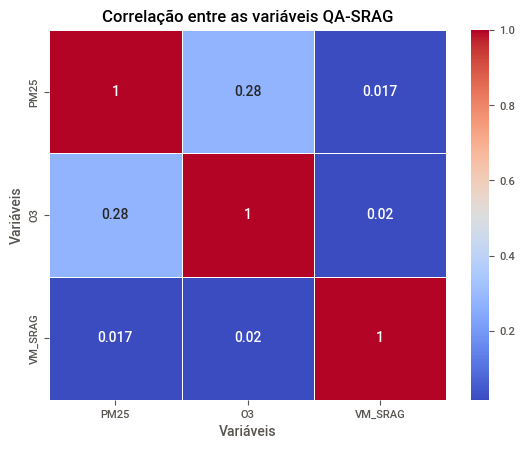

In [324]:
sns.heatmap(corr_matriz1, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlação entre as variáveis QA-SRAG')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.show()

Plotar gráfico com dados do dataframe ao longo dos anos de 2020 a 2023.

In [325]:
df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')

In [326]:
df_base

,Data,PM25,O3,VM_SRAG
0,2023-03-08,35.0,24.0,3.0
1,2023-03-09,47.0,2.0,8.2
2,2023-03-10,50.0,18.0,8.2
3,2023-03-11,52.0,23.0,2.0
4,2023-03-12,37.0,14.0,1.0
...,...,...,...,...
1122,2020-03-24,52.3,20.0,22.0
1123,2020-03-25,52.3,28.0,18.0
1124,2020-03-26,52.3,33.0,17.0
1125,2020-03-27,52.3,30.0,20.0


Ajustando um dataframe ordenado por ano, com a soma de todos os casos por mês

In [327]:
df_base_mmAAAA = df_base.groupby([df_base['Data'].dt.year, df_base['Data'].dt.month])['VM_SRAG'].sum()

In [328]:
df_base_mmAAAA

Data  Data
2020  1       191.6
      2       159.8
      3       287.2
      4       427.0
      5       520.0
      6       532.0
      7       413.0
      8       345.0
      9       277.0
      10      185.4
      11      237.0
      12      318.0
2021  1       326.0
      2       250.0
      3       549.0
      4       484.0
      5       446.0
      6       319.0
      7       278.2
      8       183.0
      9       175.2
      10      131.4
      11      112.0
      12      145.6
2022  1       306.2
      2       146.0
      3       126.6
      4       130.4
      5        98.6
      6       189.8
      7       129.8
      8        97.8
      9       126.0
      10      135.4
      11      115.4
      12      108.2
2023  1       122.0
      2        97.6
      3        43.6
Name: VM_SRAG, dtype: float64

Plotando gráfico de internação por mês/ano

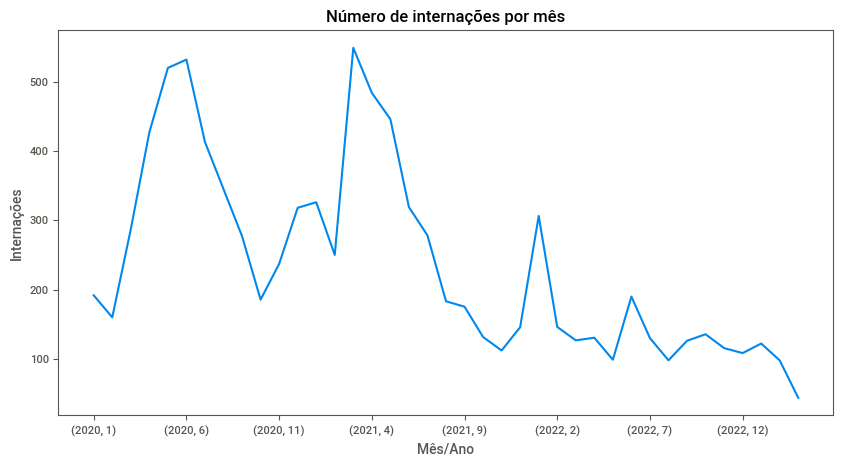

In [329]:
df_base_mmAAAA.plot(kind='line', figsize=(10, 5))
plt.title('Número de internações por mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Internações')
plt.show()

Normalizar os dados aplicando uma transformação MinMax com intevalo de 0 até 1

In [ ]:
# Criar instância do MinMaxScaler
#normalizador = MinMaxScaler(feature_range = (0,1))

#Cria um dataframe apenas com dados numéricos
#df_num = df_base.select_dtypes(include=['float64'])

# Normaliza os dados do DataFrame com dados numéricos
#df_num = pd.DataFrame(normalizador.fit_transform(df_num), columns=df_num.columns)

# Combina os dados normalizados com a coluna de data
#df_norm = pd.concat([df_base['Data'], df_num], axis=1)

#df_norm

In [ ]:
#df_norm.iloc[1113:1127]

Eliminar linhas com valores nulos

In [ ]:
#df_norm = df_norm.reindex(df_norm.index.drop(1126))
#df_norm = df_norm.reindex(df_norm.index.drop(1114))

In [ ]:
#df_norm

Criar dataframe ordenado por data

In [ ]:
#df_norm_bydate = df_norm.sort_values(['Data'], ascending=True)


In [ ]:
#df_norm_bydate = df_norm_bydate.reset_index(drop=True)
#df_norm_bydate

Gerar Matriz de Correlação com dados normalizados

In [ ]:
#corr_matriz2 = df_norm_bydate.corr()

Gerar Heatmap com dados normalizados 

In [ ]:
#sns.heatmap(corr_matriz2, annot=True, cmap='coolwarm', linewidths=.5)
#plt.title('Correlação entre as variáveis QA-SRAG')
#plt.xlabel('Variáveis')
#plt.ylabel('Variáveis')
#plt.show()

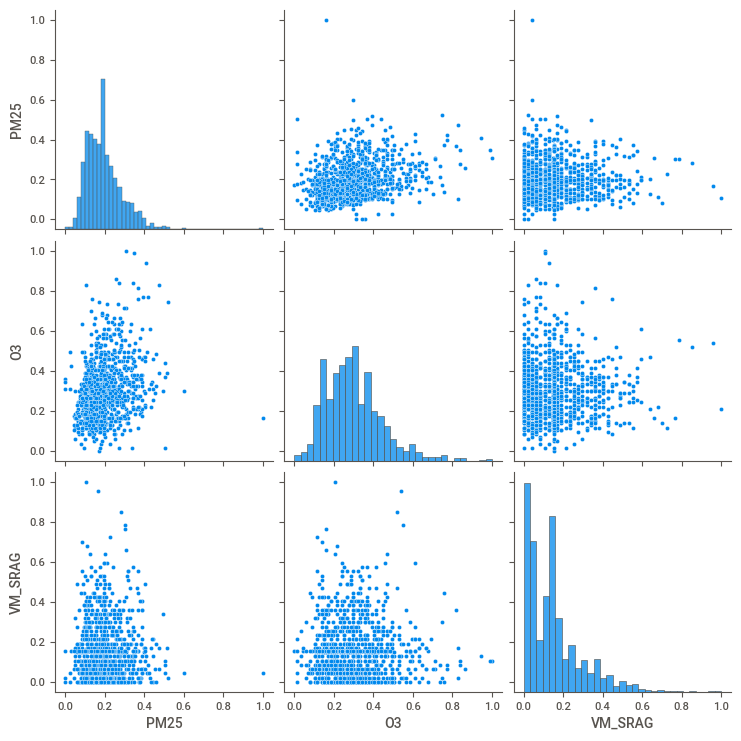

In [ ]:
#sns.pairplot(df_norm_bydate)

Separação Treino/Validação/Teste

O código seguinte cria um dataframe 1-c de todos os valores que constam na coluna VM_SRAG

In [451]:
# Utilizar Dataframe normalizado
#Y = pd.get_dummies(df_norm_bydate ['VM_SRAG'])

# Utilizar dataframe não normalizado
#Y = pd.get_dummies(df_base ['VM_SRAG'])
Y = df_base.drop(['Data','PM25','O3'], axis = 1)
Y

,VM_SRAG
0,3.0
1,8.2
2,8.2
3,2.0
4,1.0
...,...
1122,22.0
1123,18.0
1124,17.0
1125,20.0


In [452]:
# Utilizar Dataframe normalizado
#X = df_norm_bydate.drop(['Data','VM_SRAG'], axis=1)

# Utilizar Dataframe não normalizado
X = df_base.drop(['Data','VM_SRAG'], axis=1)

X

,PM25,O3
0,35.0,24.0
1,47.0,2.0
2,50.0,18.0
3,52.0,23.0
4,37.0,14.0
...,...,...
1122,52.3,20.0
1123,52.3,28.0
1124,52.3,33.0
1125,52.3,30.0


In [453]:
# Separação desenvolvimento (90) e teste (10)
X_dev, X_test, Y_dev, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

# Separação treino (80) e validação (20)
X_train, X_val, Y_train, Y_val = train_test_split(X_dev, Y_dev, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(810, 2)
(203, 2)
(113, 2)
(810, 1)
(203, 1)
(113, 1)


In [454]:
#from sklearn.neural_network import MLPRegressor

#mlp = MLPRegressor(hidden_layer_sizes=(100, 75), activation='relu', solver='adam', max_iter=500)


In [ ]:
#mlp.fit(X_train, y_train)
#y_pred = mlp.predict(X_test)

#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#print('R²:', r2_score(Y_test, Y_pred))
#print('MAE:', mean_absolute_error(Y_test, Y_pred))
#print('MSE:', mean_squared_error(Y_test, Y_pred))


In [ ]:
#x_prev = [[50, 16]]
#y_prev = mlp.predict(x_prev)
#y_prev

Definir Modelo MLP

In [464]:
class MLP(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(MLP,self).__init__()
        self.rede = nn.Sequential(
            nn.Linear(input_dim,100),
            nn.Tanh(),
            nn.Linear(100,250),
            nn.LogSigmoid(),
            nn.Linear(250,output_dim),
            nn.ReLU(),
        )
    def forward(self,x):
        out =  self.rede(x)
        return out

Instanciar Modelo

In [465]:
input_dim  = 2 # número de atributos de entrada (X)
output_dim = 1 # número de classes (Y)

modelo = MLP(input_dim,output_dim) # Criação do modelo (rede)

In [466]:
from torchsummary import summary

print(modelo)
summary(modelo, (1126,2))

MLP(
  (rede): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=250, bias=True)
    (3): LogSigmoid()
    (4): Linear(in_features=250, out_features=1, bias=True)
    (5): ReLU()
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1126, 100]             300
              Tanh-2            [-1, 1126, 100]               0
            Linear-3            [-1, 1126, 250]          25,250
        LogSigmoid-4            [-1, 1126, 250]               0
            Linear-5              [-1, 1126, 1]             251
              ReLU-6              [-1, 1126, 1]               0
Total params: 25,801
Trainable params: 25,801
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 6.03
Params size (MB): 0.10


Definir Função de Custo e Otimização

In [469]:
eta = 0.1
mm_factor = 0.2
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(modelo.parameters(),lr=eta, momentum = mm_factor)

Treinamento
Transformar dados em tensores pytorch

In [470]:
x_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(Y_train.values)

x_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(Y_val.values)

x_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(Y_test.values)

In [471]:
y_val.size()

torch.Size([203, 1])

In [472]:
# verificando disponibilidade da gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

Definir Laço de Treinamento de Rede

In [473]:
def train_network(model,optimizer,loss_function,x_train,y_train,x_val,y_val,num_epochs,train_losses,val_losses):
    for epoch in range(num_epochs):
        # zerando os gradientes da época anterior
        optimizer.zero_grad()
        
        # fase de propagação
        output_train = model(x_train)

        # cálculo do erro (função de custo - loss function)
        loss_train = loss_function(output_train, y_train)

        # fase de retroprogação
        loss_train.backward()

        # atualização dos pesos da rede
        optimizer.step()

        # avaliando o modelo com o conjunto de validação
        output_val = model(x_val)
        loss_val = loss_function(output_val,y_val)

        train_losses[epoch] = loss_train.item()
        val_losses[epoch] = loss_val.item()

        if (epoch + 1) % 100 == 0:
            print(f"Època {epoch+1}/{num_epochs}, Erro Treino: {loss_train.item():.4f},  Erro Validação: {loss_val.item():.3f}")

In [ ]:
num_epochs = 6000
train_losses = np.zeros(num_epochs)
val_losses  = np.zeros(num_epochs)

train_network(modelo,optimizer,loss_function,x_train,y_train,x_val,y_val,num_epochs,train_losses,val_losses)

Verificar resultados

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='Erro de Treino')
plt.plot(val_losses, label='Erro de Validação')
plt.legend()
plt.show()

In [368]:
predictions_train = []
predictions_val = []
predictions_test =  []
with torch.no_grad():
    predictions_train = modelo(x_train)
    predictions_val = modelo(x_val)
    predictions_test = modelo(x_test)

# Cálculo do erro (Função de Custo)
erro_train = loss_function(predictions_train,y_train)
erro_val = loss_function(predictions_val,y_val)
erro_test = loss_function(predictions_test,y_test)

print(f"Erro de Treino: {erro_train}")
print(f"Erro de Validação: {erro_val}")
print(f"Erro de Teste: {erro_test}")

Erro de Treino: 114.448486328125
Erro de Validação: 112.60077667236328
Erro de Teste: 103.21345520019531


In [371]:
# Cálculo da Acurácia de Classificação:

pred_train = torch.argmax(predictions_train, dim=1)
label_train = torch.argmax(y_train, dim=1)
pred_val = torch.argmax(predictions_val, dim=1)
label_val = torch.argmax(y_val, dim=-1)
pred_test = torch.argmax(predictions_test, dim=1)
label_test = torch.argmax(y_test, dim=-1)

In [372]:
pred_train

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(y_train)
y_train.size()

In [376]:
print (label_train)
label_train.size()

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

torch.Size([810])

In [375]:

acc_train = accuracy_score(label_train, pred_train)
acc_val = accuracy_score(label_val, pred_val)
acc_test = accuracy_score(label_test, pred_test)


print(f"Acurácia de Treino: {acc_train*100:.2f}%")
print(f"Acurácia de Validação: {acc_val*100:.2f}%")
print(f"Acurácia de Teste: {acc_test*100:.2f}%")

Acurácia de Treino: 100.00%
Acurácia de Validação: 100.00%
Acurácia de Teste: 100.00%


In [ ]:
#saída do modelo
X = X_norm * (max - min) + min